In [2]:
using JLD, PyPlot

In [26]:
archivo="../JLDFiles/Deshinibida/140116s2/140116s2cut2_evento_8.jld"

"../JLDFiles/Deshinibida/140116s2/140116s2cut2_evento_8.jld"

In [27]:
Arxivo=load(archivo)

Dict{String,Any} with 5 entries:
  "Canalesrespuesta" => Set(Array{Int64,1}[[27,62],[36,44],[37,62],[48,50],[33,…
  "LFPTotal"         => [-4122.99 -4.02832 … -12.085 6.04248; -26.1841 -14.0991…
  "CSDLindenberg"    => [3.61242 7.29131 … -2.35779 2.24285; -9.30192 -1.88156 …
  "freq"             => 7.02206
  "CanalesSaturados" => Set(Array{Int64,1}[[58,57],[38,9],[18,2],[21,57],[30,58…

In [28]:
#nota=Arxivo["Nota"]

In [29]:
CSD=Arxivo["CSDLindenberg"];
LFP=Arxivo["LFPTotal"];
#KOp=Arxivo["KTT_KInv"];

In [30]:
(alto,ancho,tmax)=size(CSD)

(64,64,2001)

In [31]:
satu=length(Arxivo["CanalesSaturados"])

14

In [32]:
listonga=(135,139,149)   

(135,139,149)

In [33]:
freq=Arxivo["freq"]
#retrazo=Arxivo["retrazo"]

7.022058198545425

In [34]:
retrazo=0

0

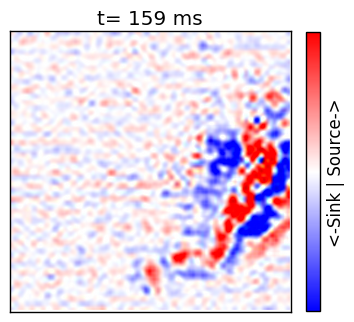

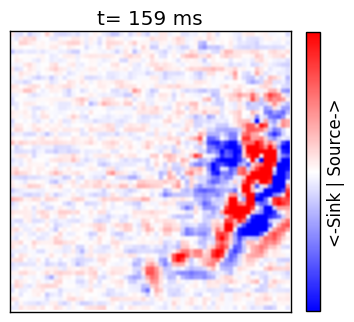

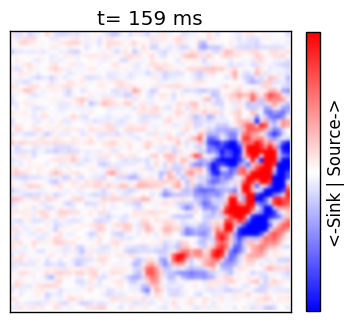

In [35]:
t=1114
#ion()
ioff()
lista=("sinc", "hanning", "gaussian")
limites=50
for interpol in lista
figure(figsize=(4,4))
    xlim(0,65)
    ylim(65,0)

    ejemplo=CSD[:,:,t]
    tiempo=round(Int,(t-retrazo)/freq)

tick_params(
    axis="both",          # changes apply to the x-axis
    which="both",      # both major and minor ticks are affected
    bottom="off",      # ticks along the bottom edge are off
    top="off",
    right="off",
    left="off",
# ticks along the top edge are off
    labelbottom="off",
    labelleft="off")

    title("t= $tiempo ms")
    imagen=imshow((ejemplo), origin="lower", interpolation=interpol,
    cmap="bwr", 
                      vmin=-limites,vmax=limites, extent=[0,64.5,0.5,64.5])

cbx=colorbar(imagen, fraction=0.045, ticks=[]) 

cbx[:set_label]("<-Sink | Source->")
end

In [36]:
ioff()
limites=50
inicio=1009
retrazo=inicio
final=1500
paso=1
for t=inicio:paso:final
#t=954
    figura=figure(figsize=(4,4))
    xlim(0,65)
    ylim(65,0)

    ejemplo=CSD[:,:,t]
    tiempo=@sprintf("%3.2f",(t-retrazo)/freq);
    title("t= $tiempo ms")
    imagen=imshow((ejemplo), origin="lower", interpolation="gaussian",
                  cmap="coolwarm", 
                  vmin=-limites,vmax=limites, extent=[0.5,64.5,0.5,64.5])

   cbx=colorbar(imagen, fraction=0.045, ticks=[]) 
   cbx[:set_label]("<-Sink | Source->")
    savefig("CSDDifferenceSmooth_140116s2_08_$t.svg",dpi=90)
    close(figura)
end
PyPlot.close_figs()

In [ ]:
bchica=readdlm("../kCSD/BceroDura-r-0.0675.dat")
btchica=readdlm("../kCSD/BtildeceroDura-r-0.0675.dat");

In [ ]:
aver=imshow(bchica,interpolation="nearest", cmap="gnuplot")
cbx=colorbar(aver)

In [ ]:
bgrande=readdlm("../kCSD/BceroDura-r-0.25.dat")
btgrande=readdlm("../kCSD/BtildeceroDura-r-0.25.dat");

In [ ]:
aver=imshow(b,interpolation="nearest", cmap="gnuplot")
cbx=colorbar(aver)

In [ ]:
size(bgrande)
tu=vec(bgrande[64,:])
te=vec(bchica[64,:])

In [ ]:
plot(1:127,tu)
plot(1:127,te)

In [ ]:
bgmin=bgrande/minimum(bgrande)

In [ ]:
cloack=bgmin-brmin

In [ ]:
imshow(cloack,cmap="gnuplot",interpolation="none")
colorbar()

In [ ]:
xlim(0,65)
ylim(0,65)
imshow(KOp,cmap="gnuplot", vmin=-1,vmax=1)
colorbar()

In [ ]:
KOp[1:64,1:64]